In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

import igraph as ig
import networkx as nx

#from matplotlib import rc, rcParams
from matplotlib.colors import LogNorm

from scipy.integrate import odeint
from HTC_utils import *

from scipy.stats import truncnorm

In [2]:
folder = 'data_draft_2/'

In [3]:
r1 = 0.001
r2 = 0.1

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus)
print(Tplus)

0.0009891196834817012
0.08333333333333334


# Erdos-Renyi - different p

In [4]:
dt = 0.01
steps = int(5e3)
N = int(1e3)

ps = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6,]
#ps = [0.1, 0.3, 0.6]
Ts = [0.5*Tminus, Tminus + 0.5*(Tplus-Tminus), 2.*Tplus]
#Ts = [0.5*Tminus, Tminus + 0.3*(Tplus-Tminus), Tminus + 0.5*(Tplus-Tminus), Tminus + 0.7*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

res = []

for p in ps:
    tmp_res = []
    
    for T in Ts:
        print('[-] T='+str(T))
        name = 'traj_N_{}_dt_{}_p_{}_T_{}.npy'.format(N,np.round(dt,3),np.round(p,2),np.round(np.log10(T),2))
        x = np.load(folder+name)
        tmp_res.append(x)
    res.append(tmp_res)

[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669


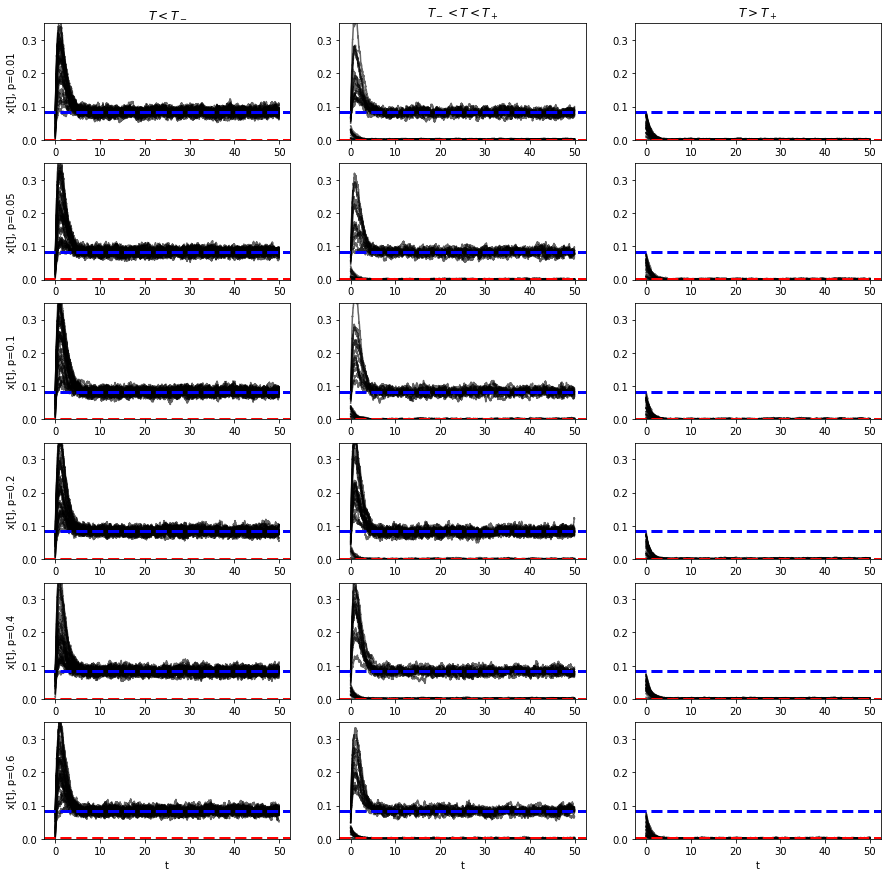

In [5]:
plt.figure(figsize=(15,15))

for i, p in enumerate(ps):
    for j, T in enumerate(Ts):
        plt.subplot(len(ps),len(Ts),i*len(Ts)+j+1)
        
        for traj in res[i][j]:
            plt.plot(np.arange(steps)*dt, traj[:steps], c='k', alpha=0.6)
        plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
        plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
        plt.ylim([0,.35])
        
        if i==0:
            plt.title(titles[j])
        
        if j%len(Ts)==0:
            plt.ylabel('x[t], p='+str(p))
        if i==len(ps)-1:
            plt.xlabel('t')
plt.show()

In [6]:
ps = [0.05, 0.1, 0.2, 0.4, 0.6]
dt = 0.01
steps = int(5e3)
N = int(1e3)

res_hist = []

for p in ps:    
    name = 'hist_N_{}_dt_{}_p_{}.npy'.format(N,np.round(dt,3),np.round(p,2),np.round(np.log10(T),2))
    tmp = np.load(folder+name)
    res_hist.append(tmp)

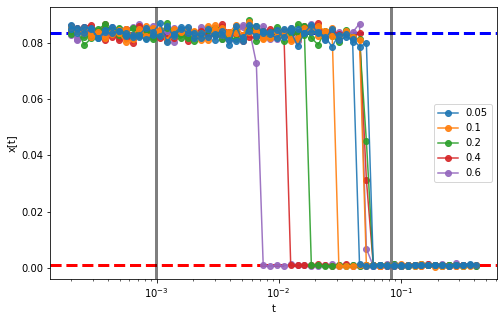

In [7]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_hist):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

# Trajectories with p=0.1 at smaller T range

In [8]:
ps = [0.1]
ks = np.arange(0,1+0.1,0.1)
#Ts = [Tminus + 0.5*(Tplus-Tminus)]
Ts = Tminus + ks*(Tplus-Tminus)
#Ts = [0.5*Tminus, Tminus + 0.3*(Tplus-Tminus), Tminus + 0.5*(Tplus-Tminus), Tminus + 0.7*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

dt = 0.01
steps = int(5e4)
N = int(1e3)

res_1 = []

for p in ps:
    tmp_res = []
    
    for T in Ts:
        name = 'traj_N_{}_dt_{}_p_{}_T_{}.npy'.format(N,np.round(dt,3),np.round(p,2),np.round(np.log10(T),2))
        x = np.load(folder+name)
        tmp_res.append(x)
    res_1.append(tmp_res)

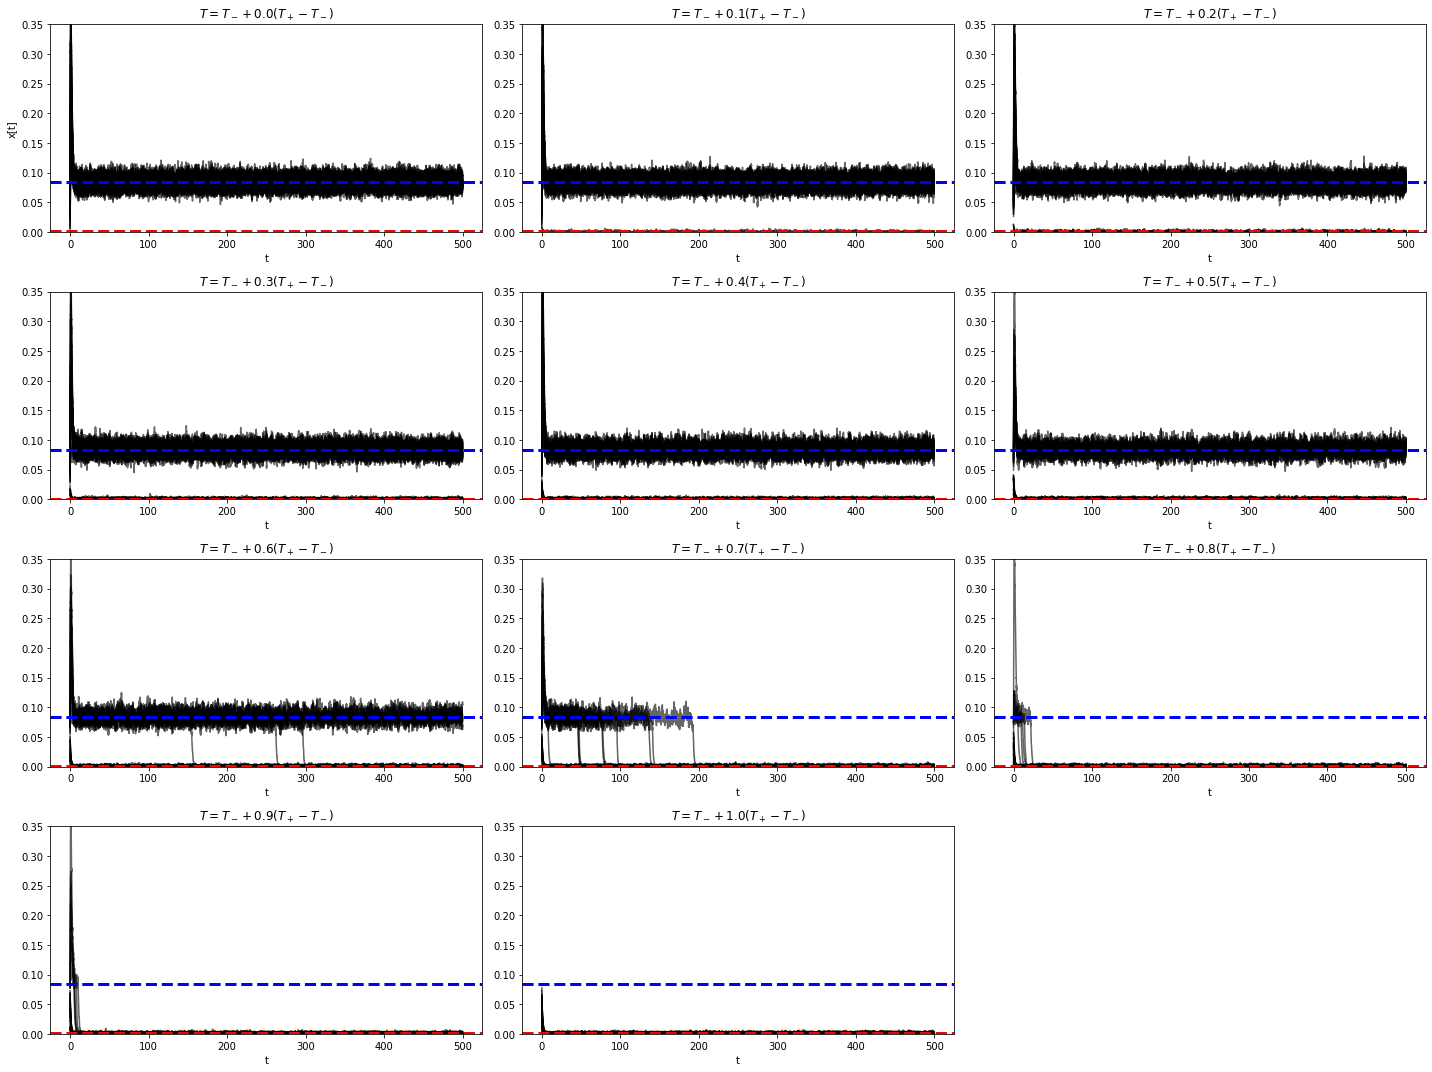

In [9]:
plt.figure(figsize=(20,15))

for j, T in enumerate(Ts):
    plt.subplot(4,len(Ts)//3,j+1)
        
    for traj in res_1[0][j]:
        plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
    plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
    plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
    plt.ylim([0,.35])
        
    if j==0:
        plt.ylabel('x[t]')
    plt.xlabel('t')
    plt.title(r'$T=T_- + $'+str(np.round(ks[j],1))+r'$(T_+ - T_-)$')

plt.tight_layout()
plt.show()

# Change weights distributions
* uniform
* power law/exponential (see other works)
* truncated normal
* power law

In [10]:
pdfs = ['uniform', 'exp', 'normal', 'powlaw']
#pdfs = ['uniform']

dt = 0.01
steps = int(5e3)
eq_steps = int(5e3)
N = int(1e3)

res_2 = []

for pdf in pdfs:
    name = 'hist_N_{}_dt_{}_pdf_{}.npy'.format(N,np.round(dt,3),pdf)
    tmp = np.load(folder+name)
    
    res_2.append(tmp)

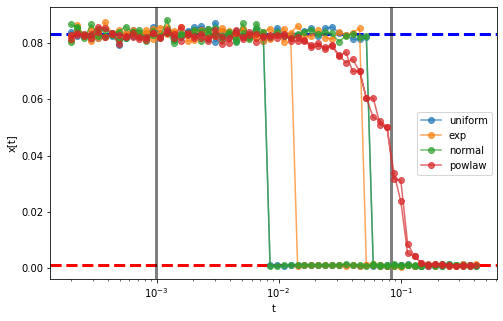

In [11]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_2):
    plt.plot(res[0], res[1], '-o', zorder=2, label=pdfs[i], alpha=0.7)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

# Connectome

In [12]:
W = np.loadtxt('connectome.txt')

N = W.shape[0]

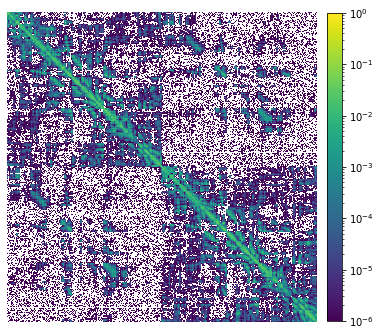

In [13]:
plt.figure(figsize=(6,6))
im = plt.imshow(W, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [52]:
#name = 'hist_connectome_dt_{}.npy'.format(np.round(dt,3))
name = 'kkk_hist_connectome_dt_{}.npy'.format(np.round(dt,3))
res_connectome_1 = np.load(folder+name)

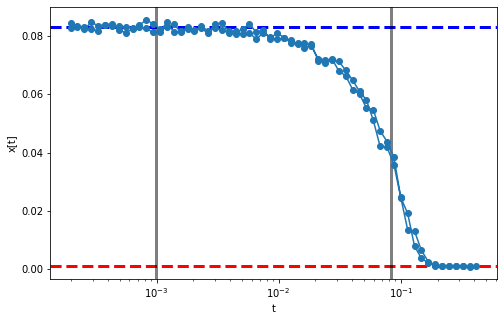

In [31]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_1[0], res_connectome_1[1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

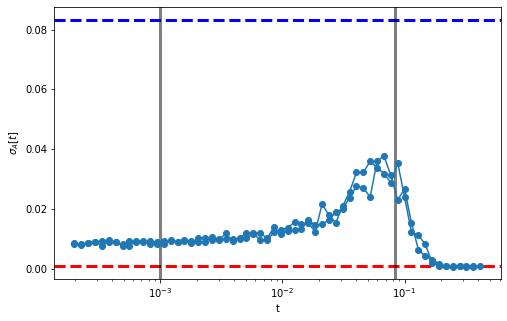

In [34]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_1[0], res_connectome_1[2], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel(r'$\sigma_A[t]$')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

In [16]:
ks = np.arange(0,1.4,0.1)
Ts = Tminus + ks*(Tplus-Tminus)

dt = 0.01
steps = int(5e3)

res_connectome = []
    
for T in Ts:
    print('[-] T='+str(T))
    
    name = 'traj_connectome_dt_{}_T_{}.npy'.format(np.round(dt,3),np.round(np.log10(T),2))
    tmp = np.load(folder+name)
    res_connectome.append(tmp)

[-] T=0.0009891196834817012
[-] T=0.009223541048466866
[-] T=0.01745796241345203
[-] T=0.0256923837784372
[-] T=0.033926805143422355
[-] T=0.04216122650840752
[-] T=0.05039564787339269
[-] T=0.05863006923837785
[-] T=0.06686449060336301
[-] T=0.07509891196834818
[-] T=0.08333333333333334
[-] T=0.09156775469831852
[-] T=0.09980217606330369
[-] T=0.10803659742828883


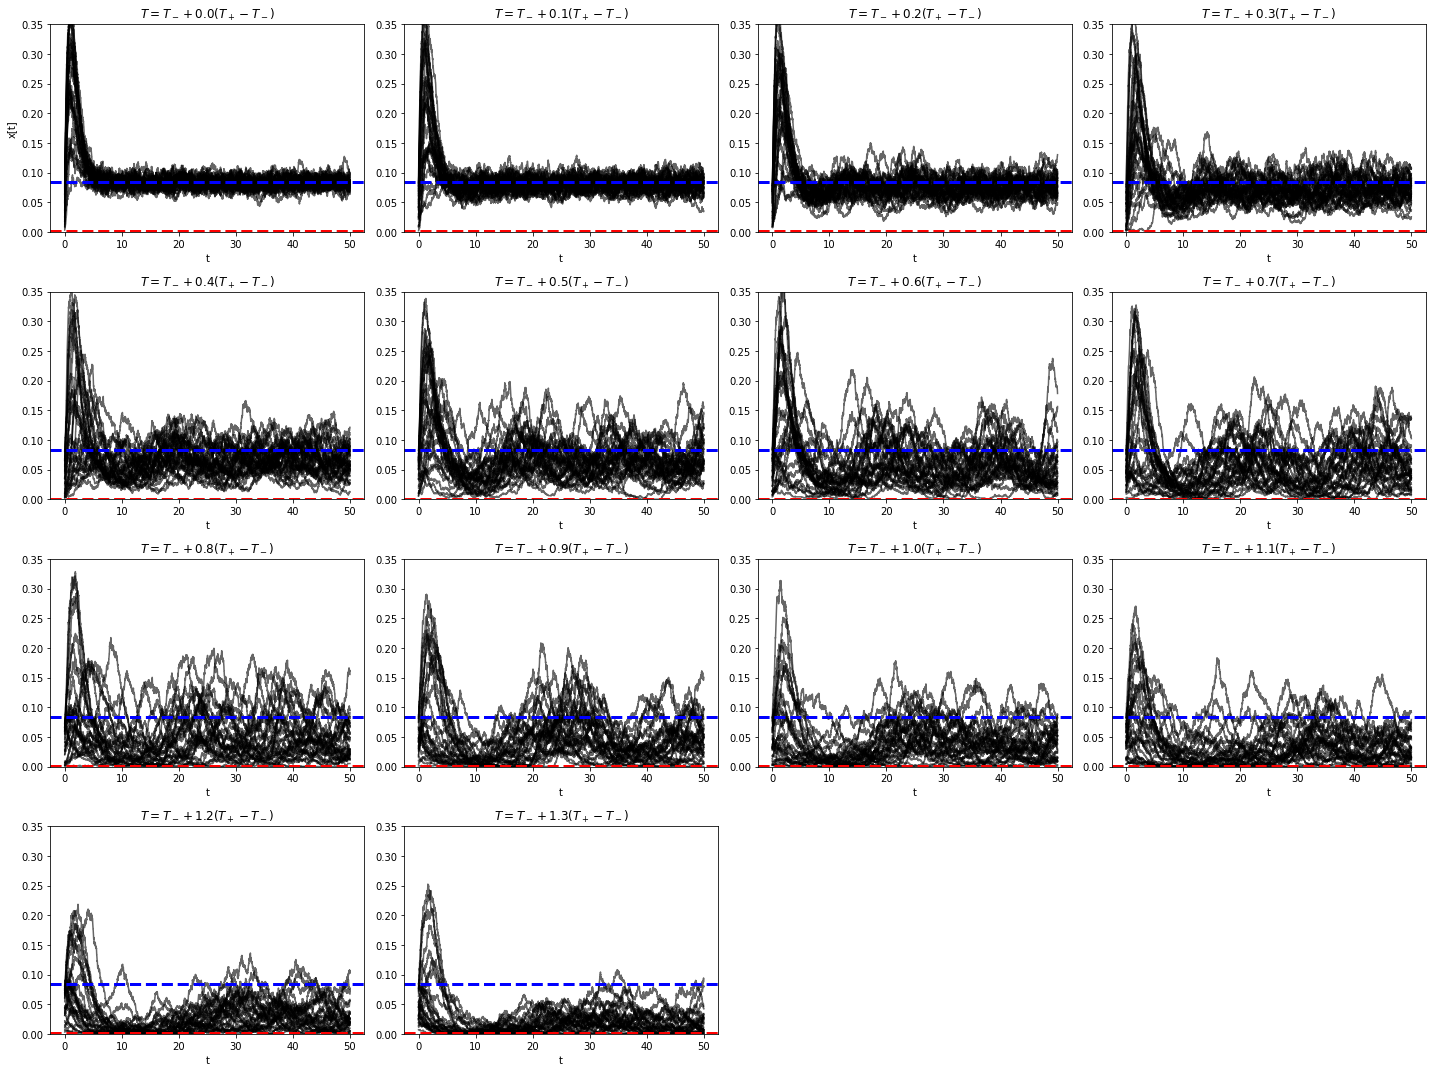

In [17]:
plt.figure(figsize=(20,15))

for j, T in enumerate(Ts):
    plt.subplot(4,len(Ts)//3,j+1)
        
    for traj in res_connectome[j]:
        plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
    plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
    plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
    plt.ylim([0,.35])
        
    if j==0:
        plt.ylabel('x[t]')
    plt.xlabel('t')
    plt.title(r'$T=T_- + $'+str(np.round(ks[j],1))+r'$(T_+ - T_-)$')

plt.tight_layout()
plt.show()

# Connectome - randomized

In [18]:
Wrand = np.load('randomized/333749_8.txt.npy')

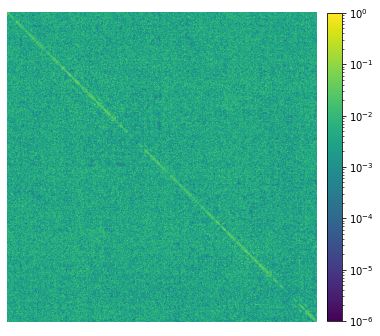

In [19]:
plt.figure(figsize=(6,6))
im = plt.imshow(Wrand, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [43]:
name = 'hist_connectome_rand_dt_{}.npy'.format(np.round(dt,3))
res_connectome_rand = np.load(folder+name)

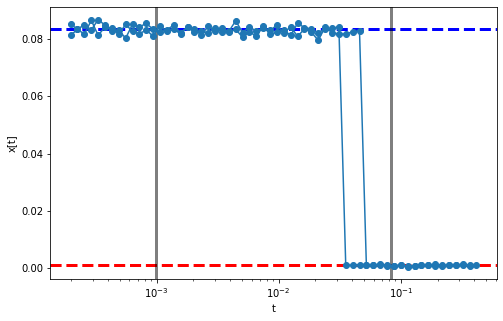

In [44]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_rand[0], res_connectome_rand[1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

# Connectome - binarized

In [22]:
Wbin = np.loadtxt('connectome.txt')
Wbin = (Wbin>0).astype(int)

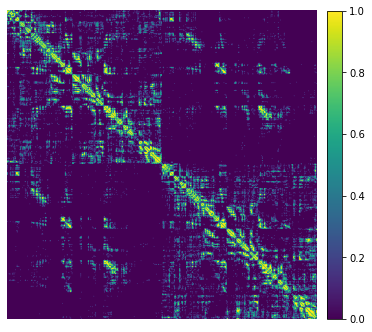

In [23]:
plt.figure(figsize=(6,6))
im = plt.imshow(Wbin)
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [24]:
name = 'hist_connectome_bin_dt_{}.npy'.format(np.round(dt,3))
res_connectome_bin = np.load(folder+name)

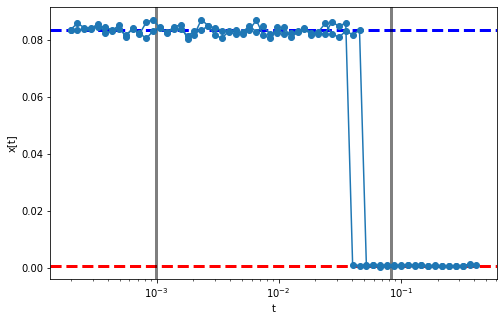

In [25]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_bin[0], res_connectome_bin[1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

# Power spectrum

In [50]:
def Psup(w, r1, r2):
    return ( (2*r2 * (1 + r2 + r2**2 + w**2))
           / (1 + 2*r2) / ( (1 + 2*r2)**2 + (2 + r2**2)*w**2 + w**4) )

def Psub(w,r1,r2):
    return ( 2*r1*r2 * (r1**2 + r1*r2 + r2**2 + w**2) /
          (r1 + r2 + r1*r2)  / ((r1 + r2 + r1*r2)**2 + (1 + r1**2 + r2**2)*w**2 + w**4 ))

def my_power_spectrum(x, dt, nperseg=int(1e4)):
    return signal.welch(x, nperseg = nperseg, fs = 1/dt, scaling = 'density')

def w_max(r1, r2):
    return np.sqrt( (1+r1+r2)*np.sqrt(r1*r2) - r1**2 - r2**2 - r1*r2 )

def get_dynamical_range(Exc, stimuli, low=0.1, high=0.9):
    '''
    Compute the dynamical range
    '''
    delta = np.zeros(len(Exc))
    
    for i in range(len(Exc)):        
        # Get A90 and A10
        Amax, Amin = np.max(Exc[i]), np.min(Exc[i])
        A10, A90 = (Amax-Amin)*low + Amin, (Amax-Amin)*high + Amin
        # Get corresponent index
        s10 = np.where( (A10 > Exc[i][:-1])*(A10 < Exc[i][1:]) )[0][-1]
        s90 = np.where( (A90 > Exc[i][:-1])*(A90 < Exc[i][1:]) )[0][0]
        # Get the s value by linear interpolation
        s10 = (stimuli[s10]-stimuli[s10+1]) / (Exc[i][s10]-Exc[i][s10+1]) * (A10 - Exc[i][s10+1]) + stimuli[s10+1]
        s90 = (stimuli[s90]-stimuli[s90+1]) / (Exc[i][s90]-Exc[i][s90+1]) * (A90 - Exc[i][s90+1]) + stimuli[s90+1]
        
        # Dynamical range
        delta[i] = 10*np.log10(s90 / s10)
        
    return delta

In [53]:
Tlow = 1e-3
Tcrit = res_connectome_1[0][np.argmax(res_connectome_1[2])]
Thigh = 3e-1

Ts = [Tlow, Tcrit, Thigh]
print(Ts)

[0.001, 0.06778900917426983, 0.3]


# Connectome

In [67]:
dt = 0.01
steps = int(1e4)

res_connectome_pw = []
    
for T in Ts:
    print('[-] T='+str(T))
    
    name = 'traj_long_connectome_dt_{}_T_{}.npy'.format(np.round(dt,3),np.round(np.log10(T),2))
    x = np.load(folder+name)
    res_connectome_pw.append(x)

[-] T=0.001
[-] T=0.06778900917426983
[-] T=0.3


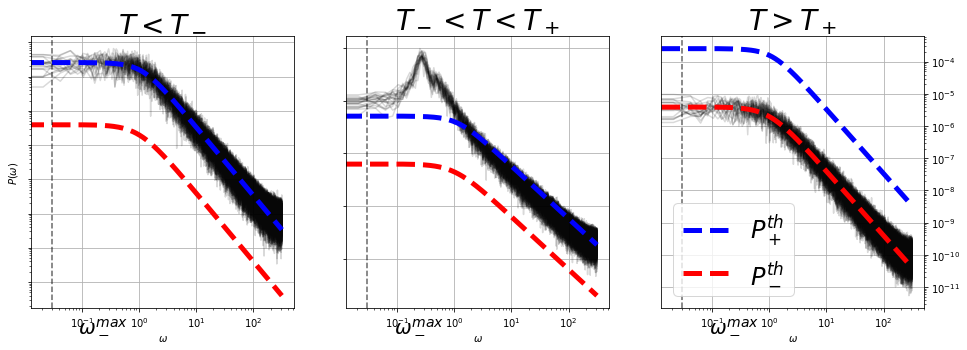

In [72]:
size = 28
lw=5

plt.figure(figsize=(16,5))

for i, T in enumerate(Ts):

    ax = plt.subplot(1, len(Ts), i+1)
    
    for x in res_connectome_pw[i]:
        f, S = my_power_spectrum(x, dt, nperseg=int(3e4))
    
        plt.plot(2*np.pi*f, S, c='k', alpha=0.15)

    plt.plot(2*np.pi*f, Psup(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_+^{th}$', lw=lw, c='blue')
    plt.plot(2*np.pi*f, Psub(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_-^{th}$', lw=lw, c='r')
        
    plt.xlabel(r'$\omega$')
    if i==0:
        plt.ylabel(r'$P(\omega)$')
        
    plt.title(titles[i], size=size)
    plt.locator_params(nbins=4)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.axvline(w_max(r1, r2), c='k', ls='--', alpha=0.6)
    
    ax.text(0.18, -0.08, r'$\omega_-^{max}$',transform=ax.transAxes, size=20)
    
    #plt.text(-7, 1, 'coap')
    
    #plt.xticks(fontsize=size-14)
    #plt.yticks(fontsize=size-14)
    
    if i < len(Ts)-1:
        ax.yaxis.set_ticklabels([])
    else:
        ax.yaxis.tick_right()
    
    plt.grid()
    
    if i==len(Ts)-1:
        plt.legend(fontsize=size-4)
        
    #plt.xlim([9e-2, 5e1])
    #plt.ylim([1e-7, 1e-4])

plt.show()
#plt.tight_layout()
#plt.savefig("figures/spectrum.pdf")

# Connectome - randomized

In [74]:
dt = 0.01
steps = int(1e4)

res_connectome_pw = []
    
for T in Ts:
    print('[-] T='+str(T))
    
    name = 'traj_long_connectome_rand_dt_{}_T_{}.npy'.format(np.round(dt,3),np.round(np.log10(T),2))
    x = np.load(folder+name)
    res_connectome_pw.append(x)

[-] T=0.001
[-] T=0.06778900917426983
[-] T=0.3


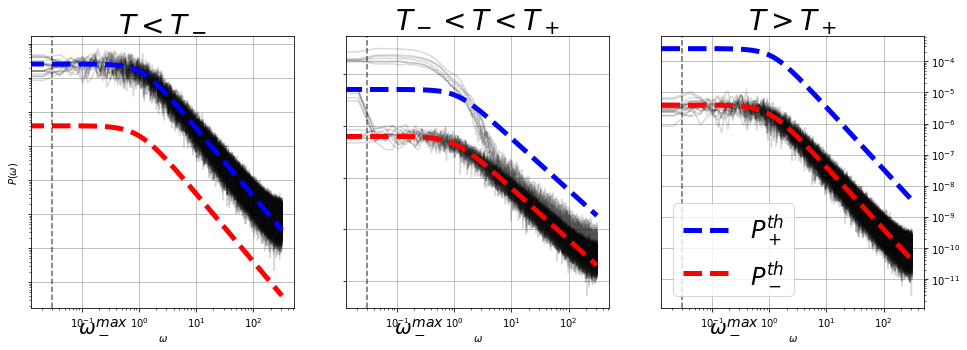

In [75]:
size = 28
lw=5

plt.figure(figsize=(16,5))

for i, T in enumerate(Ts):

    ax = plt.subplot(1, len(Ts), i+1)
    
    for x in res_connectome_pw[i]:
        f, S = my_power_spectrum(x, dt, nperseg=int(3e4))
    
        plt.plot(2*np.pi*f, S, c='k', alpha=0.15)

    plt.plot(2*np.pi*f, Psup(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_+^{th}$', lw=lw, c='blue')
    plt.plot(2*np.pi*f, Psub(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_-^{th}$', lw=lw, c='r')
        
    plt.xlabel(r'$\omega$')
    if i==0:
        plt.ylabel(r'$P(\omega)$')
        
    plt.title(titles[i], size=size)
    plt.locator_params(nbins=4)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.axvline(w_max(r1, r2), c='k', ls='--', alpha=0.6)
    
    ax.text(0.18, -0.08, r'$\omega_-^{max}$',transform=ax.transAxes, size=20)
    
    #plt.text(-7, 1, 'coap')
    
    #plt.xticks(fontsize=size-14)
    #plt.yticks(fontsize=size-14)
    
    if i < len(Ts)-1:
        ax.yaxis.set_ticklabels([])
    else:
        ax.yaxis.tick_right()
    
    plt.grid()
    
    if i==len(Ts)-1:
        plt.legend(fontsize=size-4)
        
    #plt.xlim([9e-2, 5e1])
    #plt.ylim([1e-7, 1e-4])

plt.show()
#plt.tight_layout()
#plt.savefig("figures/spectrum.pdf")